In [1]:
# Importar las librerías necesarias
import pandas as pd

# Cargar el archivo CSV en un DataFrame
# Reemplazar 'Walmart_Standardized.csv' con la ruta correcta al archivo
try:
    data = pd.read_csv('Walmart_Standardized.csv', delimiter=',')  # Asegurarse de usar el delimitador correcto
    print("Datos cargados correctamente.")
except FileNotFoundError:
    print("Archivo no encontrado. Asegúrate de que la ruta al archivo sea correcta.")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

# Verificar las primeras filas para confirmar que los datos se han cargado correctamente
data.head()


Datos cargados correctamente.


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Standardized,Holiday Season
0,1,05-02-2010,1643690.90,0,"42,31","2,572",21109635.82,"8,106","1,057,337,552",0
1,1,12-02-2010,1641957.44,1,"38,51","2,548",21124216.98,"8,106","1,054,266,038",0
2,1,19-02-2010,1611968.17,0,"39,93","2,514",21128914.29,"8,106","1,001,128,115",0
3,1,26-02-2010,1409727.59,0,"46,63","2,561",21131964.29,"8,106","642,778,468",0
4,1,05-03-2010,1554806.68,0,"46,5","2,625",21135014.29,"8,106","899,843,794",0


Media de las ventas totales semanales: $47113419.49


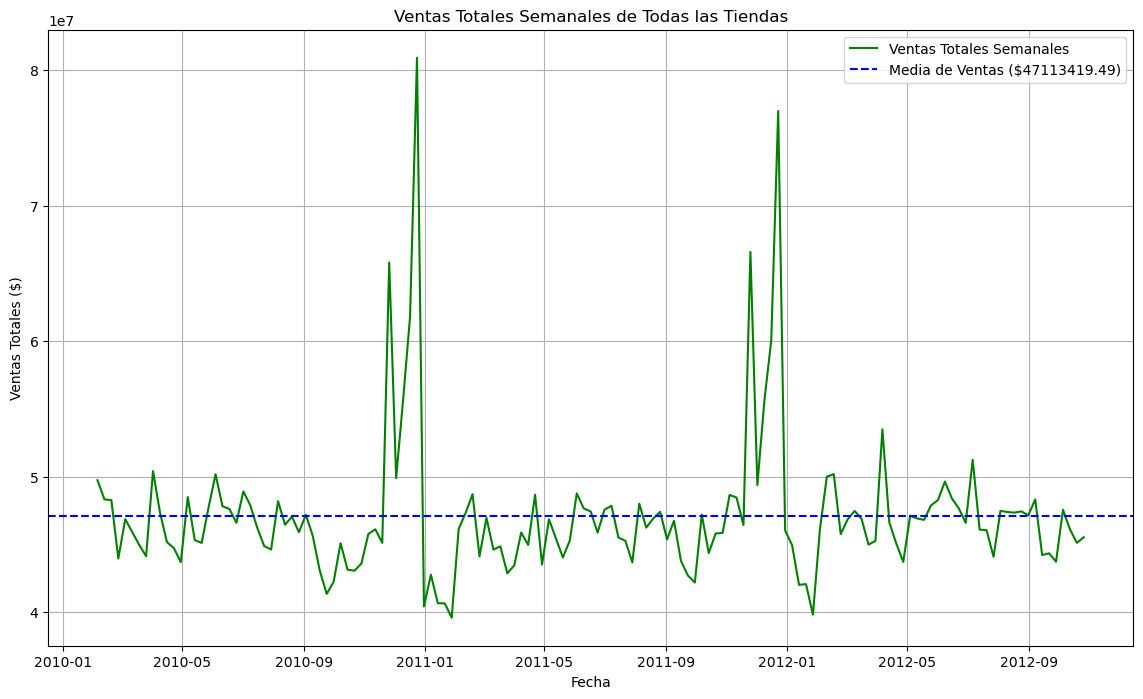

Media de las ventas semanales (sin Holiday Season): $46015005.67


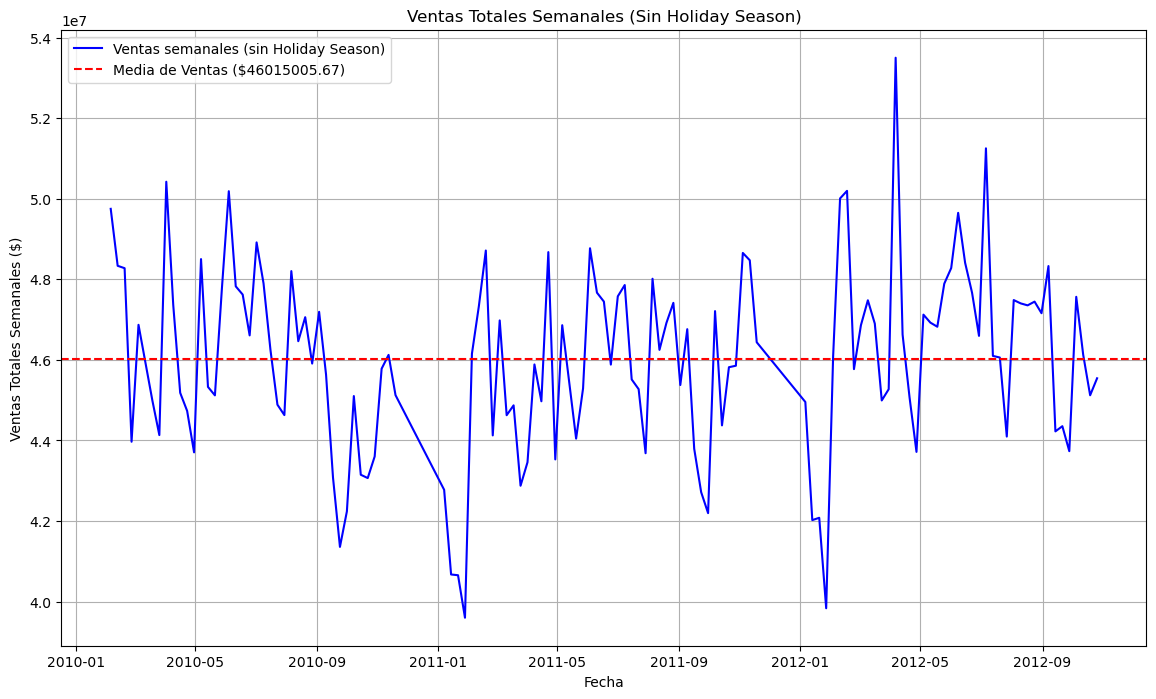

Diferencia en promedio de ventas (con vs sin Holiday Season): $1098413.82



In [124]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la columna 'Date' a formato datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# ----- Ventas Totales -----
# Agrupar las ventas totales por semana (todas las tiendas juntas)
total_weekly_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Calcular la media de las ventas totales
mean_sales_total = total_weekly_sales['Weekly_Sales'].mean()
print(f"Media de las ventas totales semanales: ${mean_sales_total:.2f}")

# Graficar las ventas totales semanales
plt.figure(figsize=(14, 8))
plt.plot(total_weekly_sales['Date'], total_weekly_sales['Weekly_Sales'], label='Ventas Totales Semanales', color='green')

# Agregar una línea horizontal para la media
plt.axhline(y=mean_sales_total, color='blue', linestyle='--', label=f'Media de Ventas (${mean_sales_total:.2f})')

# Etiquetas, título y leyendas
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales ($)')
plt.title('Ventas Totales Semanales de Todas las Tiendas')
plt.legend()
plt.grid()
plt.show()

# ----- Ventas Excluyendo Holiday Season -----
# Filtrar los datos para excluir las semanas de la Holiday Season
filtered_data = data[data['Holiday Season'] == 0]

# Agrupar las ventas de todas las tiendas para obtener ventas generales semanales
filtered_weekly_sales = filtered_data.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Calcular la media de las ventas totales semanales excluyendo la Holiday Season
mean_sales_no_holiday = filtered_weekly_sales['Weekly_Sales'].mean()
print(f"Media de las ventas semanales (sin Holiday Season): ${mean_sales_no_holiday:.2f}")

# Graficar las ventas semanales excluyendo la Holiday Season
plt.figure(figsize=(14, 8))
plt.plot(filtered_weekly_sales['Date'], filtered_weekly_sales['Weekly_Sales'], label='Ventas semanales (sin Holiday Season)', color='blue')

# Agregar una línea horizontal para la media
plt.axhline(y=mean_sales_no_holiday, color='red', linestyle='--', label=f'Media de Ventas (${mean_sales_no_holiday:.2f})')

# Etiquetas, título y leyendas
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales Semanales ($)')
plt.title('Ventas Totales Semanales (Sin Holiday Season)')
plt.legend()
plt.grid(True)
plt.show()

# ----- Diferencia en las Medias -----
# Calcular e imprimir la diferencia en las medias
difference = mean_sales_total - mean_sales_no_holiday
print(f"Diferencia en promedio de ventas (con vs sin Holiday Season): ${difference:.2f}\n")


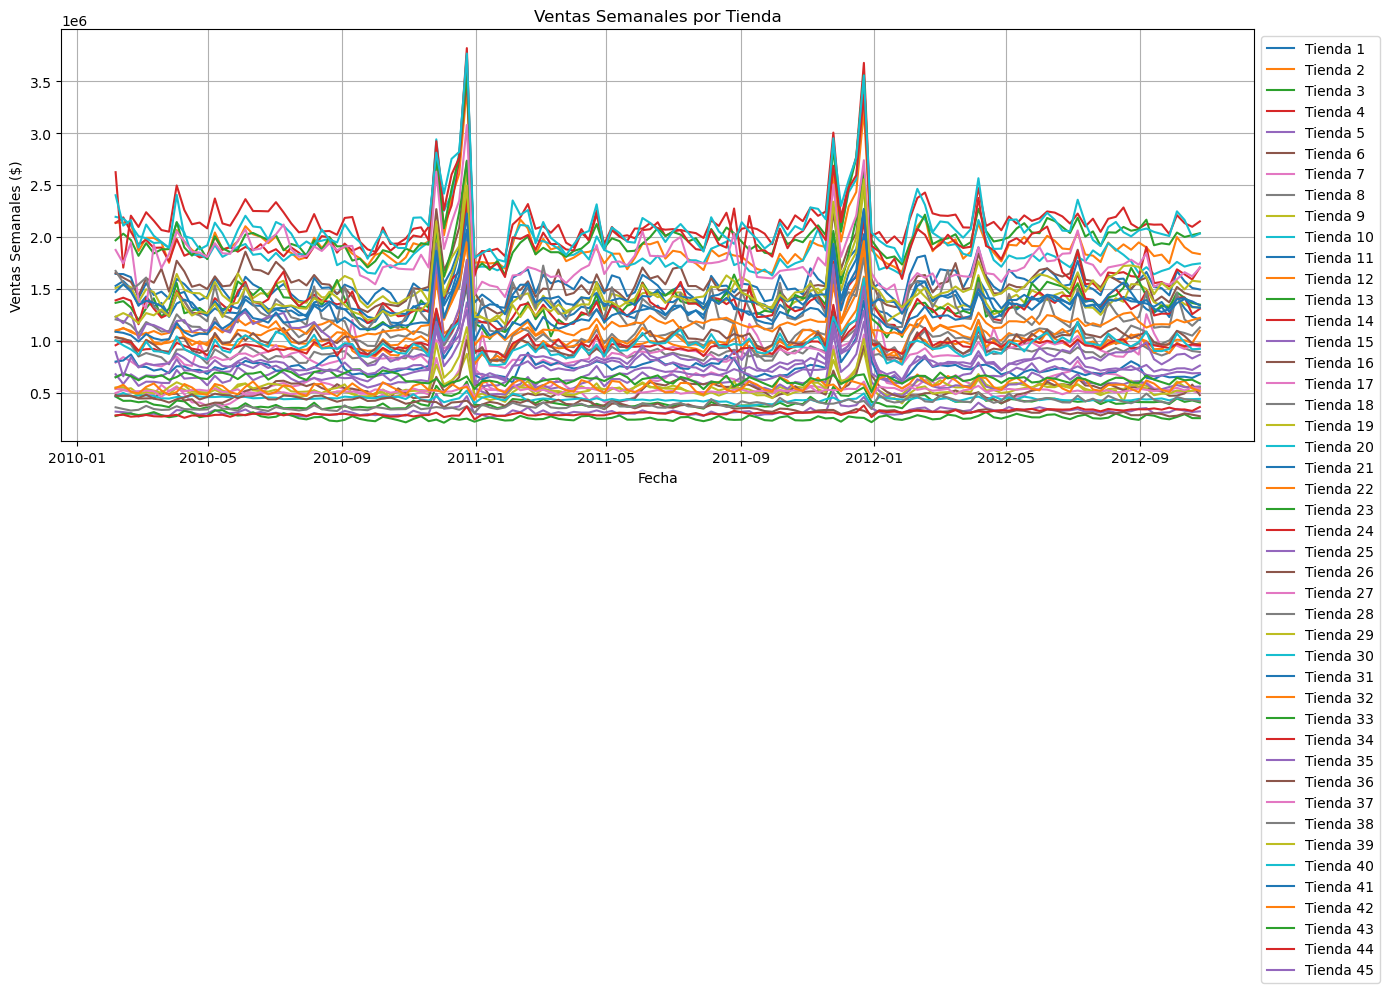

In [21]:
# Graficar las ventas semanales para cada tienda individualmente
stores = data['Store'].unique()  # Obtener la lista de tiendas únicas

plt.figure(figsize=(14, 8))
for store in stores:
    # Filtrar datos de la tienda actual
    store_data = data[data['Store'] == store].groupby('Date')['Weekly_Sales'].sum().reset_index()

    # Graficar las ventas de esta tienda
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Tienda {store}')

plt.xlabel('Fecha')
plt.ylabel('Ventas Semanales ($)')
plt.title('Ventas Semanales por Tienda')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Ubicar la leyenda fuera del gráfico
plt.grid()
plt.tight_layout()  # Ajustar los márgenes para que no se sobrepongan los elementos
plt.show()


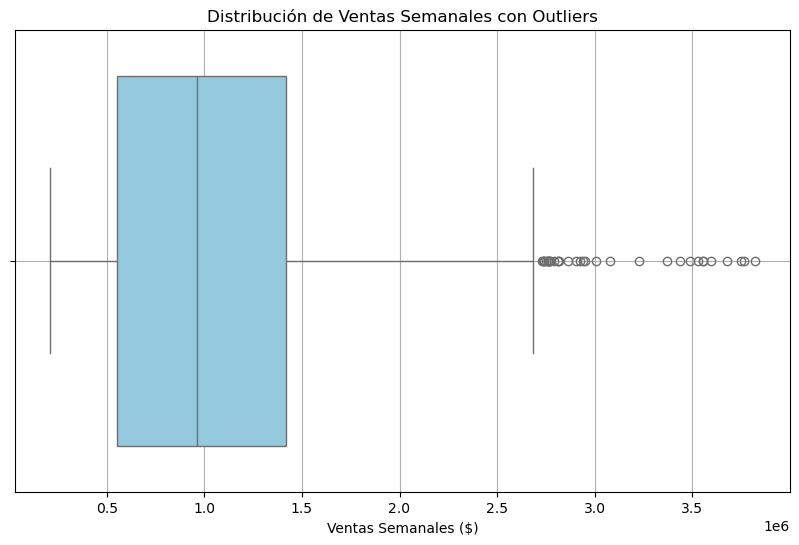

Outliers en Ventas Semanales:
           Date  Weekly_Sales
189  2010-12-24    3436007.68
241  2011-12-23    3224369.80
471  2010-11-26    2789469.45
474  2010-12-17    2740057.14
475  2010-12-24    3526713.39
523  2011-11-25    3004702.33
526  2011-12-16    2771397.17
527  2011-12-23    3676388.98
761  2010-12-24    2727575.18
1329 2010-11-26    2939946.38
1332 2010-12-17    2811646.85
1333 2010-12-24    3749057.69
1381 2011-11-25    2950198.64
1385 2011-12-23    3487986.89
1758 2010-11-26    2766400.05
1761 2010-12-17    2771646.81
1762 2010-12-24    3595903.20
1810 2011-11-25    2864170.61
1813 2011-12-16    2760346.71
1814 2011-12-23    3556766.03
1901 2010-11-26    2921709.71
1904 2010-12-17    2762861.41
1905 2010-12-24    3818686.45
1957 2011-12-23    3369068.99
2759 2010-11-26    2811634.04
2761 2010-12-10    2752122.08
2762 2010-12-17    2819193.17
2763 2010-12-24    3766687.43
2811 2011-11-25    2906233.25
2814 2011-12-16    2762816.65
2815 2011-12-23    3555371.03
3192 2010-

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el boxplot para las ventas semanales
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Weekly_Sales', color='skyblue')
plt.xlabel('Ventas Semanales ($)')
plt.title('Distribución de Ventas Semanales con Outliers')
plt.grid(True)
plt.show()

# Calcular los límites de los outliers usando el rango intercuartílico (IQR)
Q1 = data['Weekly_Sales'].quantile(0.25)  # Primer cuartil
Q3 = data['Weekly_Sales'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico
lower_bound = Q1 - 1.5 * IQR  # Límite inferior para outliers
upper_bound = Q3 + 1.5 * IQR  # Límite superior para outliers

# Filtrar los outliers
outliers = data[(data['Weekly_Sales'] < lower_bound) | (data['Weekly_Sales'] > upper_bound)]

# Mostrar las fechas y valores de los outliers
print("Outliers en Ventas Semanales:")
print(outliers[['Date', 'Weekly_Sales']])


Correlaciones entre 'Weekly_Sales' y variables relevantes:
                Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment  \
Weekly_Sales        1.000000    -0.040210    0.000589 -0.041168     -0.022591   
Temperature        -0.040210     1.000000    0.068630  0.076185     -0.004243   
Fuel_Price          0.000589     0.068630    1.000000 -0.045591     -0.005760   
CPI                -0.041168     0.076185   -0.045591  1.000000     -0.089255   
Unemployment       -0.022591    -0.004243   -0.005760 -0.089255      1.000000   
Holiday Season      0.142913    -0.211322   -0.025372 -0.007833     -0.015031   

                Holiday Season  
Weekly_Sales          0.142913  
Temperature          -0.211322  
Fuel_Price           -0.025372  
CPI                  -0.007833  
Unemployment         -0.015031  
Holiday Season        1.000000  


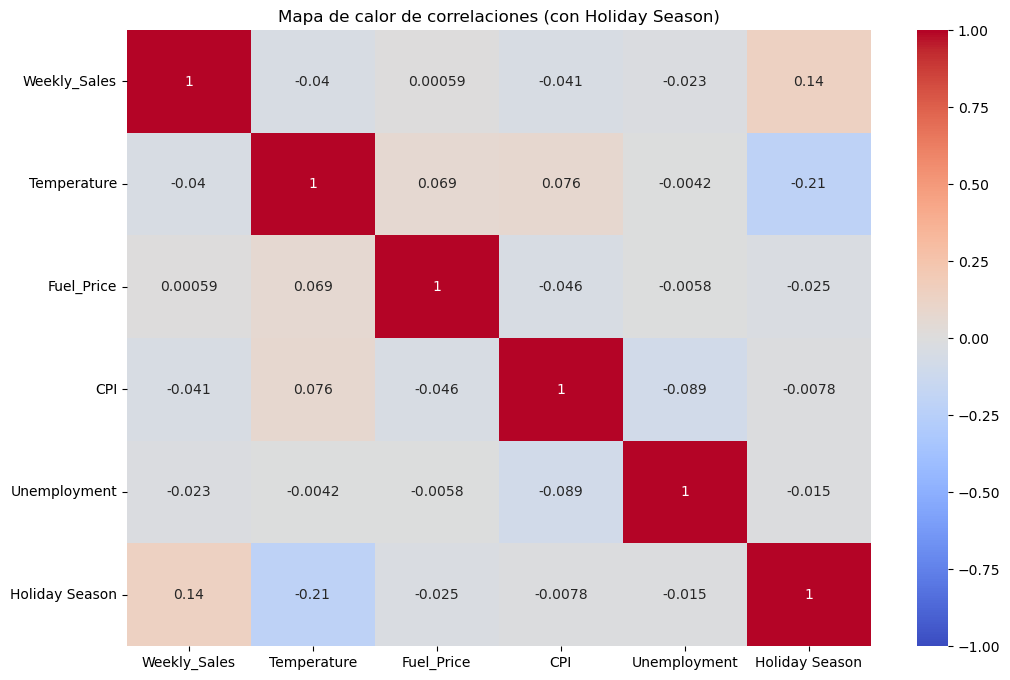

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Limpiar las columnas relevantes para asegurar que estén en formato numérico
columns_to_clean = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday Season']
for column in columns_to_clean:
    data[column] = data[column].astype(str).str.replace(',', '').astype(float)

# Calcular correlaciones entre 'Weekly_Sales' y otras variables relevantes (incluyendo Holiday_Season)
correlation_data = data[columns_to_clean].corr()
print("Correlaciones entre 'Weekly_Sales' y variables relevantes:")
print(correlation_data)

# Graficar el mapa de calor de las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlaciones (con Holiday Season)')
plt.show()


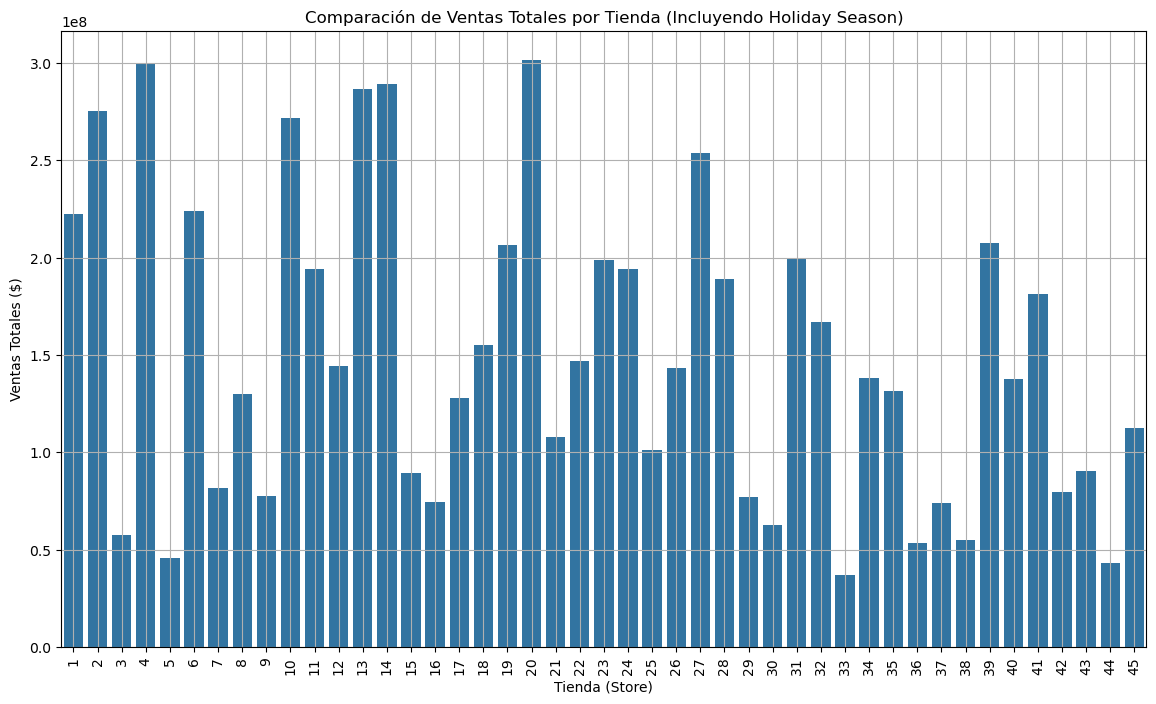

Top 5 tiendas con mejores ventas (incluyendo Holiday Season):
   Store  Weekly_Sales
0     20  3.013978e+08
1      4  2.995440e+08
2     14  2.889999e+08
3     13  2.865177e+08
4      2  2.753824e+08

Bottom 5 tiendas con menores ventas (incluyendo Holiday Season):
    Store  Weekly_Sales
40     38   55159626.42
41     36   53412214.97
42      5   45475688.90
43     44   43293087.84
44     33   37160221.96

Tienda en la posición media de ventas (incluyendo Holiday Season):
Store                  34.0
Weekly_Sales    138249763.0
Name: 22, dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar los datos de ventas semanales por tienda y ordenarlas en orden descendente de ventas
store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()

# Graficar ventas totales por tienda (incluyendo Holiday Season)
plt.figure(figsize=(14, 8))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales,dodge=False)
plt.xlabel('Tienda (Store)')
plt.ylabel('Ventas Totales ($)')
plt.title('Comparación de Ventas Totales por Tienda (Incluyendo Holiday Season)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Identificar y mostrar las tiendas con mayores ventas (Top 5)
top_stores = store_sales.head(5)
print("Top 5 tiendas con mejores ventas (incluyendo Holiday Season):")
print(top_stores)

# Identificar y mostrar las tiendas con menores ventas (Bottom 5)
bottom_stores = store_sales.tail(5)
print("\nBottom 5 tiendas con menores ventas (incluyendo Holiday Season):")
print(bottom_stores)

# Identificar y mostrar la tienda en la posición media de ventas
median_index = len(store_sales) // 2  # Calcular el índice de la posición media
median_store = store_sales.iloc[median_index]
print("\nTienda en la posición media de ventas (incluyendo Holiday Season):")
print(median_store)


# Predicciones

## ARIMA

Root Mean Squared Error (RMSE): 1845794.45
RMSE como porcentaje del promedio de ventas: 4.00%
Coeficiente de determinación (R^2): -0.5643


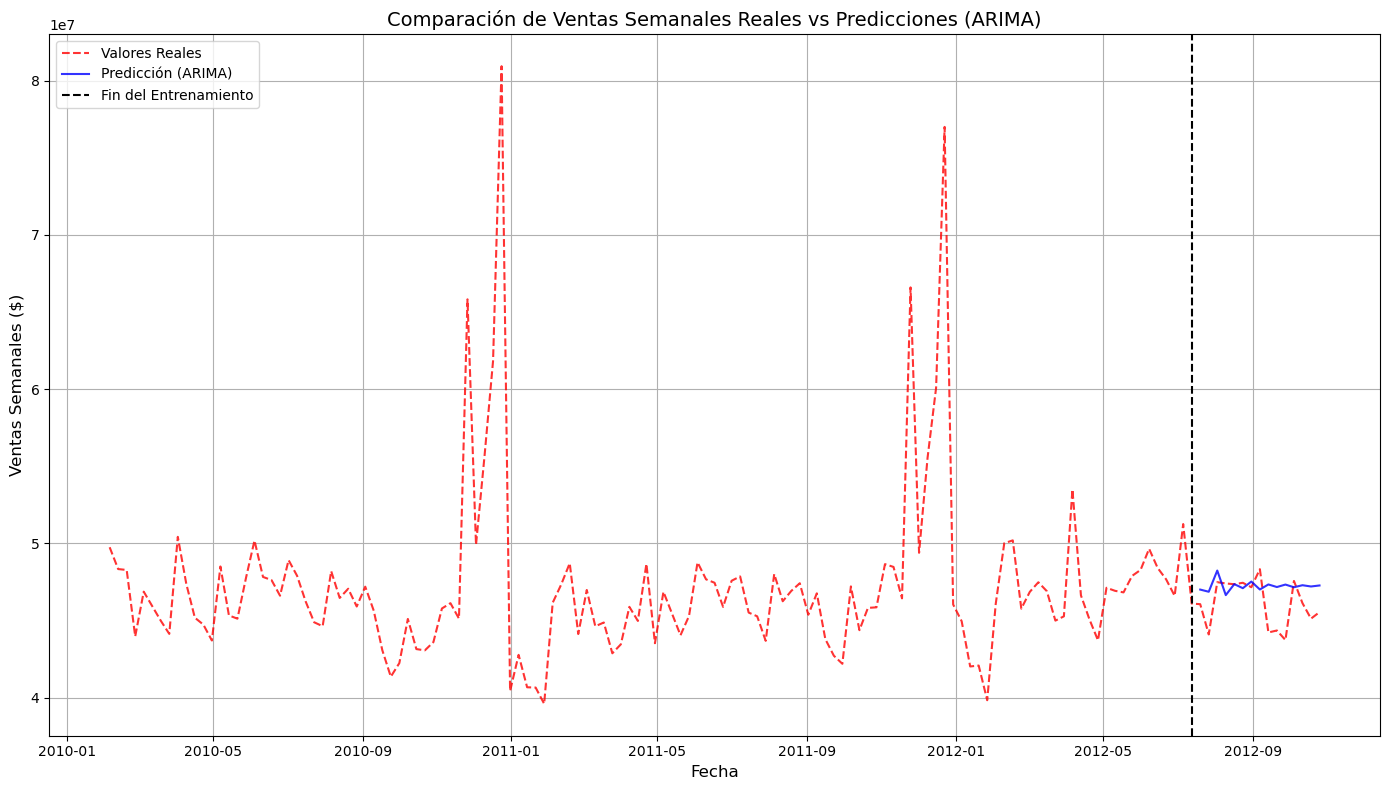

In [147]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

# Agrupar ventas semanales por fecha (incluir Holiday Season)
total_weekly_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Convertir la columna 'Date' a formato datetime
total_weekly_sales['Date'] = pd.to_datetime(total_weekly_sales['Date'])

# Dividir los datos en entrenamiento (90%) y prueba (10%)
train_size = int(len(total_weekly_sales) * 0.9)
train_data = total_weekly_sales[:train_size]
test_data = total_weekly_sales[train_size:]

# Crear el modelo ARIMA (usar p=4, d=1, q=1 como ejemplo)
model = ARIMA(train_data['Weekly_Sales'], order=(4, 1, 1))
arima_model = model.fit()

# Hacer predicciones para el conjunto de prueba
start = len(train_data)
end = len(total_weekly_sales) - 1
forecast = arima_model.predict(start=start, end=end)  

# Calcular RMSE
y_true = test_data['Weekly_Sales'].values
y_pred = forecast.values
rmse = math.sqrt(mean_squared_error(y_true, y_pred))

# Calcular RMSE en porcentaje respecto al promedio de las ventas reales
percentage_rmse = (rmse / y_true.mean()) * 100

# Calcular R^2
r2 = r2_score(y_true, y_pred)

# Imprimir métricas
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"RMSE como porcentaje del promedio de ventas: {percentage_rmse:.2f}%")
print(f"Coeficiente de determinación (R^2): {r2:.4f}")

# Crear un DataFrame para las fechas de prueba y las predicciones
test_data = test_data.copy()  # Evitar SettingWithCopyWarning
test_data['Predicted_Sales'] = forecast.values

# Graficar valores reales y predichos
plt.figure(figsize=(14, 8))

# Graficar los valores reales
plt.plot(total_weekly_sales['Date'], total_weekly_sales['Weekly_Sales'], label='Valores Reales', color='red', linestyle='--', alpha=0.8)

# Graficar las predicciones de ARIMA
plt.plot(test_data['Date'], test_data['Predicted_Sales'], label='Predicción (ARIMA)', color='blue', linestyle='-', alpha=0.8)

# Línea vertical para marcar el final del entrenamiento
plt.axvline(x=train_data['Date'].iloc[-1], color='black', linestyle='--', label='Fin del Entrenamiento')

# Títulos y ajustes
plt.title('Comparación de Ventas Semanales Reales vs Predicciones (ARIMA)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Semanales ($)', fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()


## Descomposicion de la serie

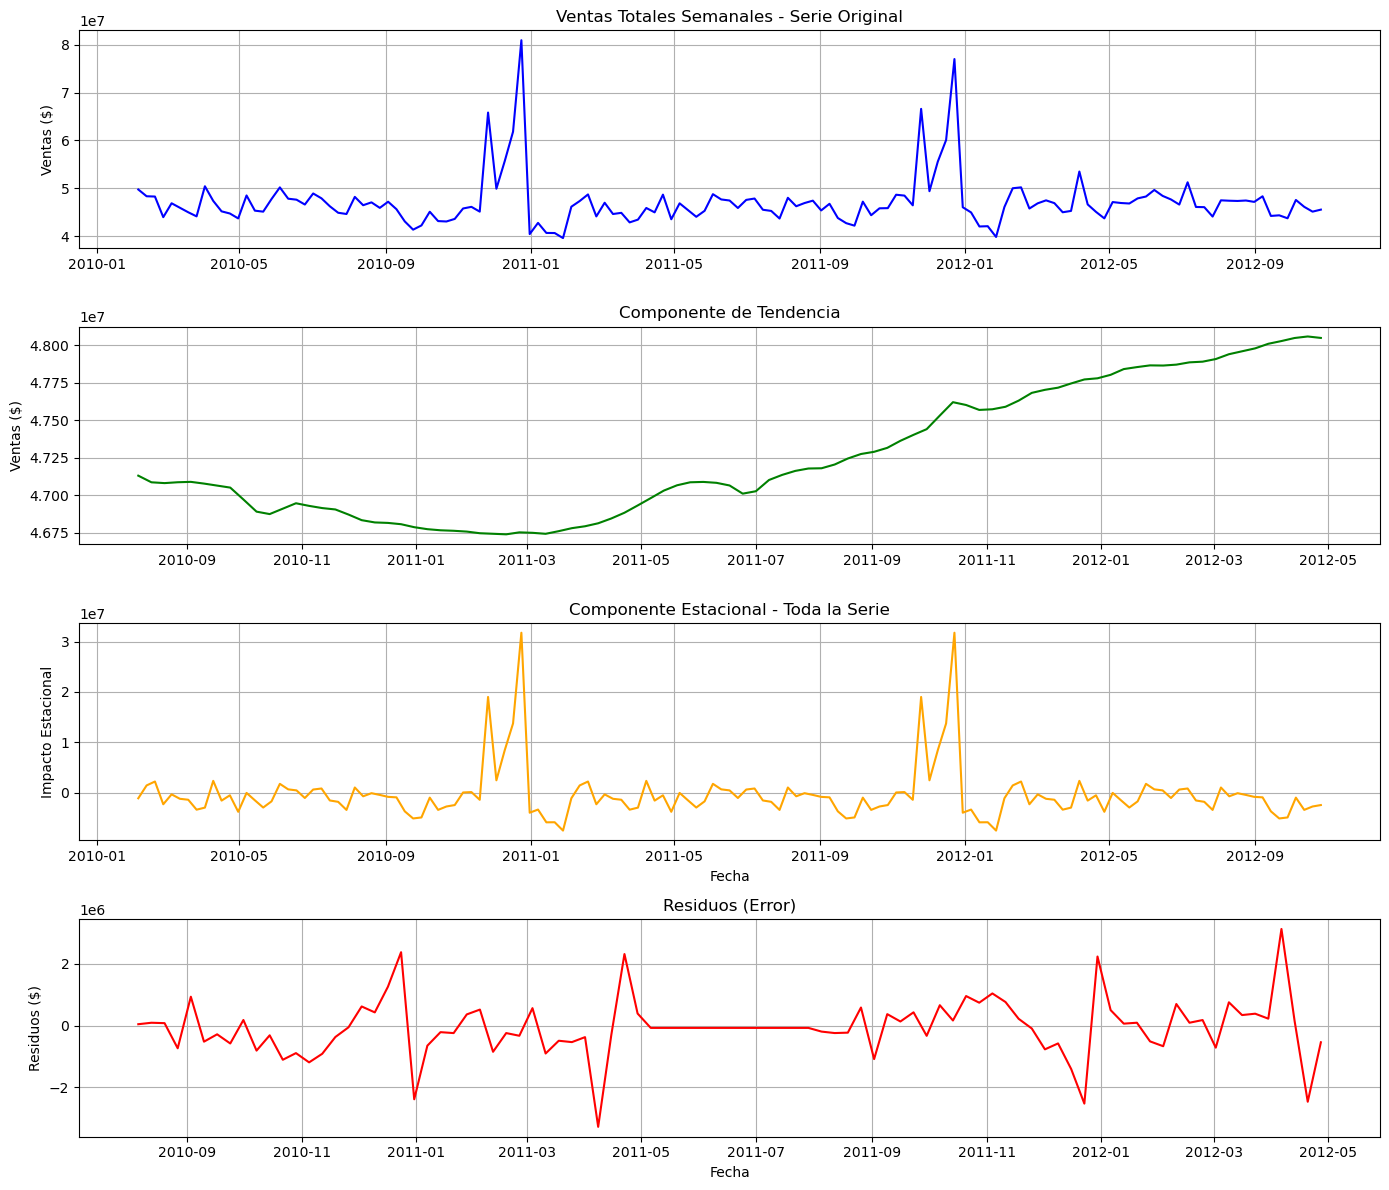

In [44]:
# Importar las librerías necesarias
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarnos de que la columna 'Date' esté en formato datetime
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

# Agrupar las ventas totales semanales para todas las tiendas
total_weekly_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Realizar la descomposición de la serie temporal
decomposition = seasonal_decompose(total_weekly_sales['Weekly_Sales'], model='additive', period=52)

# Graficar la descomposición
plt.figure(figsize=(14, 12))

# Serie original (ventas totales semanales)
plt.subplot(4, 1, 1)
plt.plot(total_weekly_sales['Date'], decomposition.observed, label='Serie Original', color='blue')
plt.title('Ventas Totales Semanales - Serie Original')
plt.ylabel('Ventas ($)')
plt.grid()

# Tendencia
plt.subplot(4, 1, 2)
plt.plot(total_weekly_sales['Date'], decomposition.trend, label='Tendencia', color='green')
plt.title('Componente de Tendencia')
plt.ylabel('Ventas ($)')
plt.grid()

# Estacionalidad
plt.subplot(4, 1, 3)
plt.plot(total_weekly_sales['Date'], decomposition.seasonal, label='Estacionalidad', color='orange')
plt.title('Componente Estacional - Toda la Serie')
plt.ylabel('Impacto Estacional')
plt.xlabel('Fecha')
plt.grid()

# Residuos
plt.subplot(4, 1, 4)
plt.plot(total_weekly_sales['Date'], decomposition.resid, label='Residuos', color='red')
plt.title('Residuos (Error)')
plt.ylabel('Residuos ($)')
plt.xlabel('Fecha')
plt.grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()


## Prophet

10:10:33 - cmdstanpy - INFO - Chain [1] start processing
10:10:33 - cmdstanpy - INFO - Chain [1] done processing


Root Mean Squared Error (RMSE): 1288007.90
RMSE como porcentaje del promedio de ventas: 2.79%
Coeficiente de determinación (R^2): 0.2383


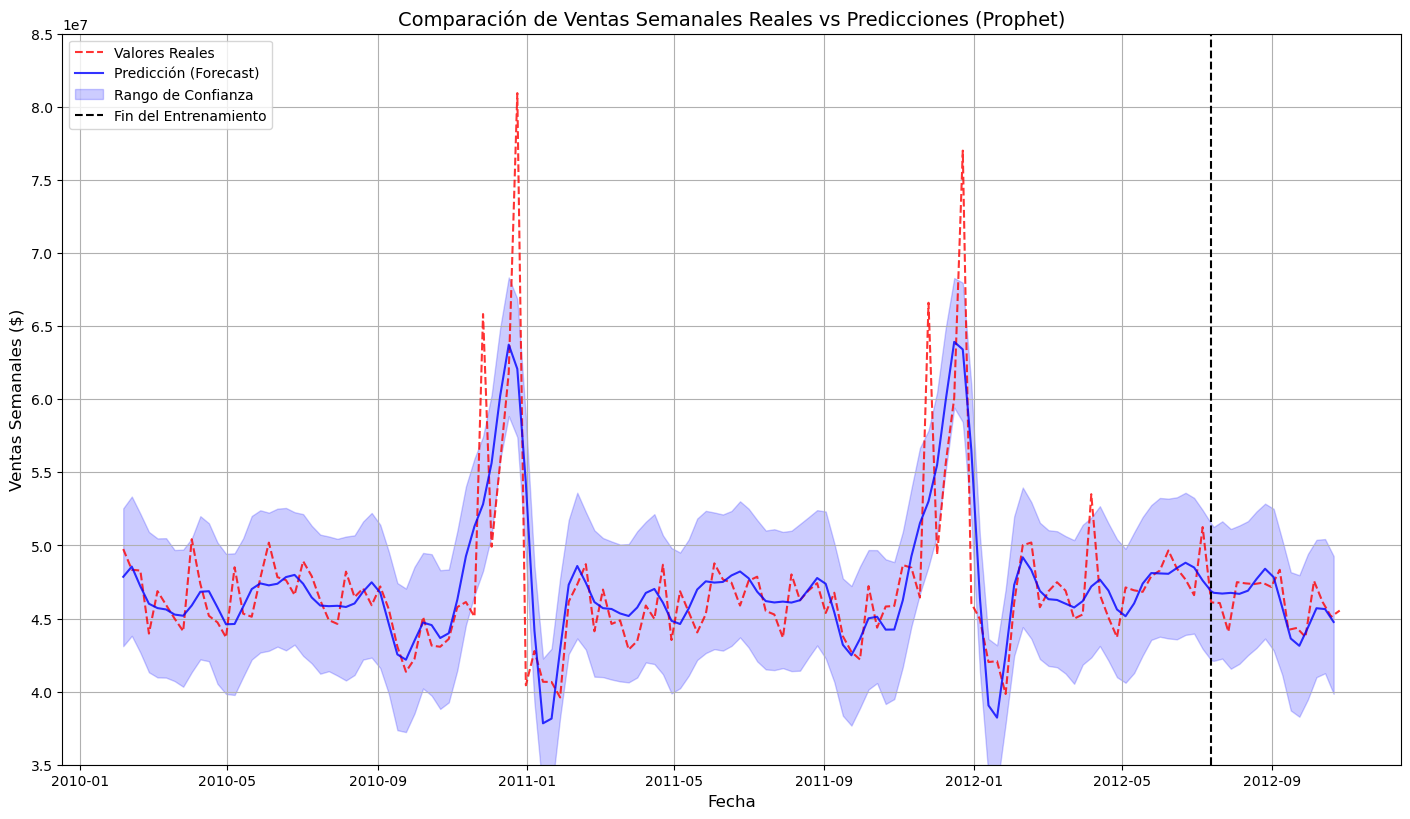

In [168]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import math
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar ventas semanales por fecha (incluir Holiday Season)
total_weekly_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Renombrar columnas para Prophet
df_prophet = total_weekly_sales.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Asegurarnos de que la columna 'ds' esté en formato datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Dividir los datos en entrenamiento (90%) y prueba (10%)
train_size = int(len(df_prophet) * 0.9)
train_data = df_prophet[:train_size]
test_data = df_prophet[train_size:]

# Crear y entrenar el modelo de Prophet
model = Prophet()
model.fit(train_data)

# Crear un DataFrame para predicciones
future = model.make_future_dataframe(periods=len(test_data), freq='W')
forecast = model.predict(future)

# Calcular RMSE
y_true = test_data['y'].values
y_pred = forecast.iloc[train_size:]['yhat'].values
rmse = math.sqrt(mean_squared_error(y_true, y_pred))

# Calcular RMSE en porcentaje respecto al promedio de las ventas reales
percentage_rmse = (rmse / y_true.mean()) * 100

# Calcular R^2
r2 = r2_score(y_true, y_pred)

# Imprimir métricas
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"RMSE como porcentaje del promedio de ventas: {percentage_rmse:.2f}%")
print(f"Coeficiente de determinación (R^2): {r2:.4f}")

# Visualización directa de valores reales, predicciones y rango de confianza
plt.figure(figsize=(14, 8))  # Tamaño ajustado para mejor visualización

# Graficar los valores reales (puntos observados)
plt.plot(df_prophet['ds'], df_prophet['y'], label='Valores Reales', color='red', linestyle='--', alpha=0.8)

# Graficar las predicciones
plt.plot(forecast['ds'], forecast['yhat'], label='Predicción (Forecast)', color='blue', linestyle='-', alpha=0.8)

# Agregar el rango de confianza
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 color='blue', alpha=0.2, label='Rango de Confianza')

# Respetar la escala del eje Y
plt.ylim([df_prophet['y'].min() - 0.5 * 10**6, df_prophet['y'].max() + 0.5 * 10**6])  # Mantener márgenes
plt.yticks(ticks=plt.yticks()[0])  # Mantener los valores originales del eje Y

# Línea vertical para marcar el final del entrenamiento
plt.axvline(x=train_data['ds'].iloc[-1], color='black', linestyle='--', label='Fin del Entrenamiento')

# Ajustar márgenes para evitar recortes
plt.tight_layout()

# Ajustar título, leyendas y etiquetas
plt.title('Comparación de Ventas Semanales Reales vs Predicciones (Prophet)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Semanales ($)', fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()


## SARIMA

C:\Users\Alejandro\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Root Mean Squared Error (RMSE): 727665.78
RMSE como porcentaje del promedio de ventas: 1.58%
Coeficiente de determinación (R²): 0.7569


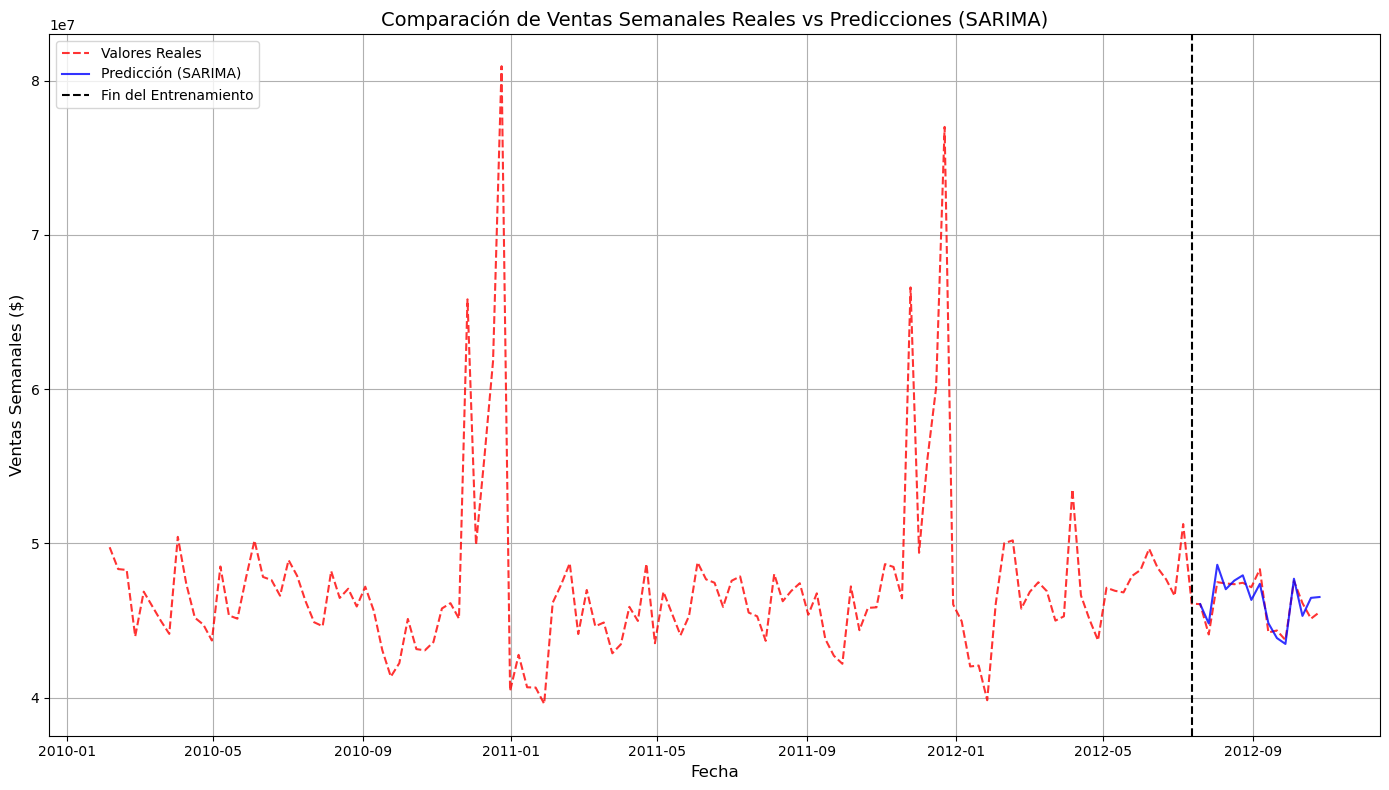

In [160]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
#SARIMAX es en realidad para analizar con variables adicionales, en este caso el parametro exog esta vacio asi que funciona como SARIMA normal
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

# Agrupar ventas semanales por fecha (incluir Holiday Season)
total_weekly_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Convertir la columna 'Date' a formato datetime
total_weekly_sales['Date'] = pd.to_datetime(total_weekly_sales['Date'])

# Dividir los datos en entrenamiento (90%) y prueba (10%)
train_size = int(len(total_weekly_sales) * 0.9)
train_data = total_weekly_sales[:train_size]
test_data = total_weekly_sales[train_size:]

# Crear el modelo SARIMA (usar p, d, q, P, D, Q y periodo de estacionalidad)
order = (4, 1, 1)  # Orden ARIMA (p, d, q)
seasonal_order = (1, 1, 1, 52)  # Orden estacional SARIMA (P, D, Q, s) con s=52 (semanal)
sarima_model = SARIMAX(train_data['Weekly_Sales'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Hacer predicciones para el conjunto de prueba
start = len(train_data)
end = len(total_weekly_sales) - 1
forecast = sarima_fit.predict(start=start, end=end)

# Calcular RMSE
y_true = test_data['Weekly_Sales'].values
y_pred = forecast.values
rmse = math.sqrt(mean_squared_error(y_true, y_pred))

# Calcular RMSE en porcentaje respecto al promedio de las ventas reales
percentage_rmse = (rmse / y_true.mean()) * 100

# Calcular R²
r2 = r2_score(y_true, y_pred)

# Imprimir métricas
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"RMSE como porcentaje del promedio de ventas: {percentage_rmse:.2f}%")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

# Crear un DataFrame para las fechas de prueba y las predicciones
test_data = test_data.copy()  # Evitar SettingWithCopyWarning
test_data['Predicted_Sales'] = forecast.values

# Graficar valores reales y predichos
plt.figure(figsize=(14, 8))

# Graficar los valores reales
plt.plot(total_weekly_sales['Date'], total_weekly_sales['Weekly_Sales'], label='Valores Reales', color='red', linestyle='--', alpha=0.8)

# Graficar las predicciones de SARIMA
plt.plot(test_data['Date'], test_data['Predicted_Sales'], label='Predicción (SARIMA)', color='blue', linestyle='-', alpha=0.8)

# Línea vertical para marcar el final del entrenamiento
plt.axvline(x=train_data['Date'].iloc[-1], color='black', linestyle='--', label='Fin del Entrenamiento')

# Títulos y ajustes
plt.title('Comparación de Ventas Semanales Reales vs Predicciones (SARIMA)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Semanales ($)', fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()
